## Data Imputation

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head() #View first rows

In [ ]:
# count the number of missing values for each column
num_missing = (df[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin"]] == 0).sum()
num_missing

In [ ]:
import numpy as np
df[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin"]] =\
df[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin"]].replace(0,np.nan)

Lot types of imputations dependent of the data

For more one could take a look here:

https://scikit-learn.org/stable/modules/impute.html

In [ ]:
df

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [ ]:
df_imputed = imputer.fit_transform(df)

In [ ]:
df_imputed

In [ ]:
np.isnan(df).sum()

In [ ]:
np.isnan(df_imputed).sum()

# Unsupervised Machine Learning (Clustering)

Unsupervised learning is the branch of Machine learning where algorithms analyze and cluster unlabeled datasets (Dimension reduction which also belongs to Unsupervised learning). These algorithms discover hidden patterns or data groupings which are not obvious. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis. Two very popular methods (algorithms) in these notes are going to be discussed in detail and applied in python:

1. Kmeans algorithm
2. Hierarchical clustering

## Kmeans algorithm

The steps of k-means algorithm in order to converge to the final result of k clusters are the
following:
1. Choosing the number of K clusters
2. Selecting k-random points in your dataset space (not necessarily belonging to your data) which are called centroids
3. Assign each data point to the closest centroid
4. Compute the new centroid of the cluster
5. Reassign each data to the new centroid
6. Repeat the last 2 steps until no new centroid emerges (The algorithm converges).

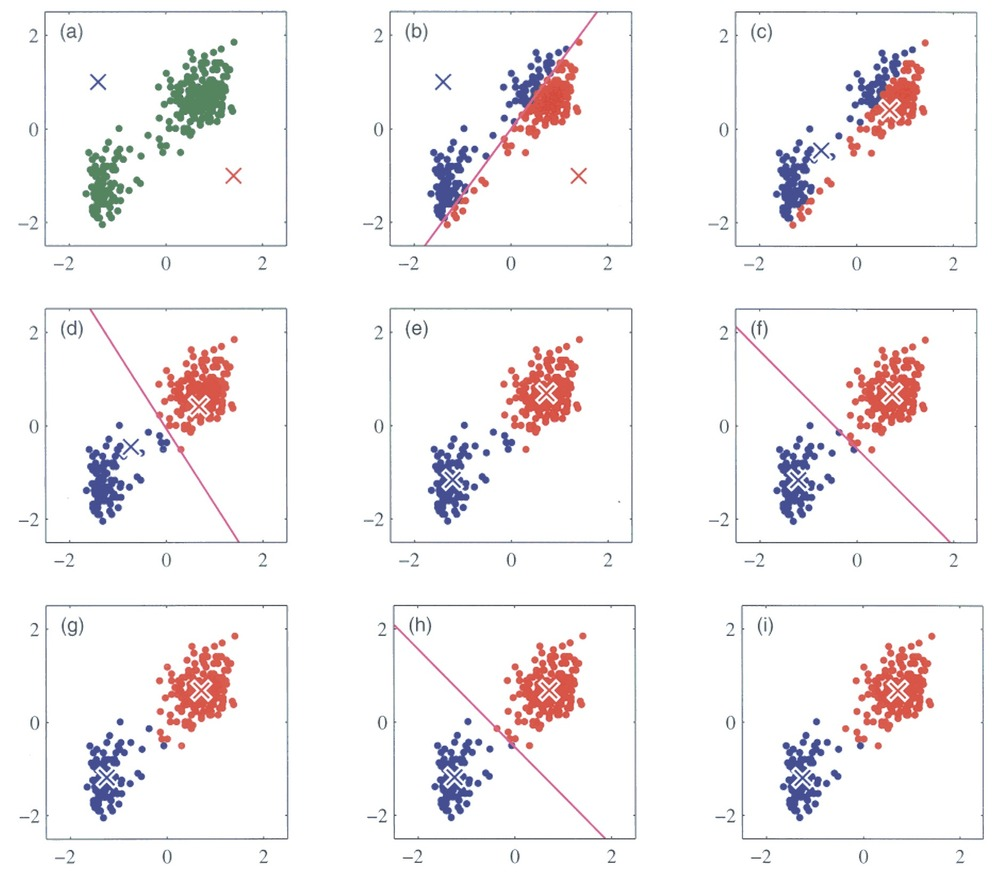

Visual representation of the clustering process (k=2, for dataset with 2 columns
(2 predictor variables) of data)

In [ ]:
df_imputed_= df_imputed[:, :-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_imputed_scaled = scaler.fit_transform(df_imputed_)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1)
fit = kmeans.fit(df_imputed_scaled)

#plt.scatter(x, y, c=kmeans.labels_)
#plt.show()

In [ ]:
# The centroids of the two groups
fit.cluster_centers_

In [ ]:
#Shows which cluster each patient belongs to
fit.labels_

## Number of patients to each group

In [ ]:
from collections import Counter
print(Counter(fit.labels_))

## Hierarchical clustering

Hierarchical clustering is a method that can provide the user with the a tree of clustering
choices, in order her/him to choose the appropriate number of clusters. This is a major
advantage compared to the k-means. One can divide the clustering process to two categories,
two modes:

Agglomerative or (Agglomerative Nesting AGNES): Supposing that n observations are
appearing in our dataset each of them is treated as its own cluster (leaf). The two clusters
that are most similar to each-other, in terms of their inter distance, are merged to one. The
algorithm proceeds in this way repeating the above similarity process until all observations
belong to one single cluster, and that is what is called a dendrogram, is complete.

Divisive hierarchical clustering: It’s also known as DIANA (Divise Analysis). Works
in the opposite way of Agglomerative. It begins with the hypothesis that all the observables
belong to one cluster and then partitions the cluster into two least similar clusters. It proceeds
recursively to form new clusters until all objects are in their own cluster

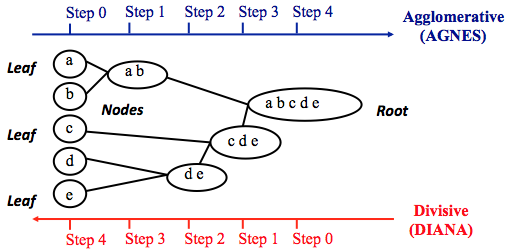

Visualization of the steps of the two types of hierarchical clustering.

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(df_imputed_scaled, method='ward'))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(df_imputed_scaled)

In [ ]:
hierarchical_cluster.labels_

In [ ]:
from collections import Counter
print(Counter(hierarchical_cluster.labels_))

## Optimal number of clusters

In [ ]:
#From anaconda prompt: conda install -c districtdatalabs yellowbrick

In [ ]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
# Different models to use
model = kmeans
#model = hierarchical_cluster

# k is range of number of clusters.method='silhouette' for using silhouette method instead of elbow
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)

visualizer.fit(df_imputed_scaled)  # Fit data to visualizer
visualizer.show()        # Finalize and render figure